In [13]:
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from __future__ import division, print_function
import numpy as np
import math
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
#import healpy as hp
import matplotlib.pyplot as plt
import plot2
import ephem
from matplotlib.ticker import Formatter, FixedFormatter, FixedLocator
from matplotlib import text
#import seaborn as sns
import time

#start_time = time.time()

In [14]:
# import data files (sessions A-F for GBT timing observations and dunc's list of all msp's are below)

psr_positions_a = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_b = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_c = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/c_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_d = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/d_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_e = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/e_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_fa = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/f_a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_fb = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/f_b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_msps = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/duncs_list_all_msps_excludeGBTsessions_1-2018.txt', usecols=(0,1))

a = SkyCoord(ra=psr_positions_a[:,0]*u.degree, dec=psr_positions_a[:,1]*u.degree, frame='icrs')
b = SkyCoord(ra=psr_positions_b[:,0]*u.degree, dec=psr_positions_b[:,1]*u.degree, frame='icrs')
c = SkyCoord(ra=psr_positions_c[:,0]*u.degree, dec=psr_positions_c[:,1]*u.degree, frame='icrs')
d = SkyCoord(ra=psr_positions_d[:,0]*u.degree, dec=psr_positions_d[:,1]*u.degree, frame='icrs')
e = SkyCoord(ra=psr_positions_e[:,0]*u.degree, dec=psr_positions_e[:,1]*u.degree, frame='icrs')
fa = SkyCoord(ra=psr_positions_fa[0]*u.degree, dec=psr_positions_fa[1]*u.degree, frame='icrs')
fb = SkyCoord(ra=psr_positions_fb[0]*u.degree, dec=psr_positions_fb[1]*u.degree, frame='icrs')
msps = SkyCoord(ra=psr_positions_msps[:,0]*u.degree, dec=psr_positions_msps[:,1]*u.degree, frame='icrs')

#print(a.ra.radian, a.dec.radian)
#print(b.ra.radian, b.dec.radian)
#print(c.ra.radian, c.dec.radian)
#print(d.ra.radian, d.dec.radian)
#print(e.ra.radian, e.dec.radian)
#print(fa.ra.radian, fa.dec.radian)
#print(fb.ra.radian, fb.dec.radian)
#print(msps.ra.radian, msps.dec.radian)


In [15]:
def plot_mwd(RA,Dec,org=0):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    
    x = SkyCoord(ra=RA*u.degree, dec=Dec*u.degree, frame='icrs')# reverse the scale: East to the left 
    
    ax.plot(x.ra.radian, x.dec.radian, 
                color ='k', linestyle='--', linewidth=2.25, label="Galactic plane", zorder=0)  


In [16]:
# plotting parameters to gussy things up a li'l

def figsize(scale):
    fig_width_pt = 513.17 #469.755    # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27         # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0    # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size
            

plt.rcParams.update(plt.rcParamsDefault)
params = {'backend': 'pdf',
    'axes.labelsize': 10,
        'lines.markersize': 4,
        'font.size': 10,
        'xtick.major.size':6,
        'xtick.minor.size':3,
        'ytick.major.size':6,
        'ytick.minor.size':3,
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        #'savefig.dpi':100,
        #'path.simplify':True,
        #'font.family': 'serif',
        #'font.serif':'Times',
        #'text.latex.preamble': [r'\usepackage{amsmath}'],
        #'text.usetex':True,
        'figure.figsize': figsize(1)}

#plt.rcParams.update(params)

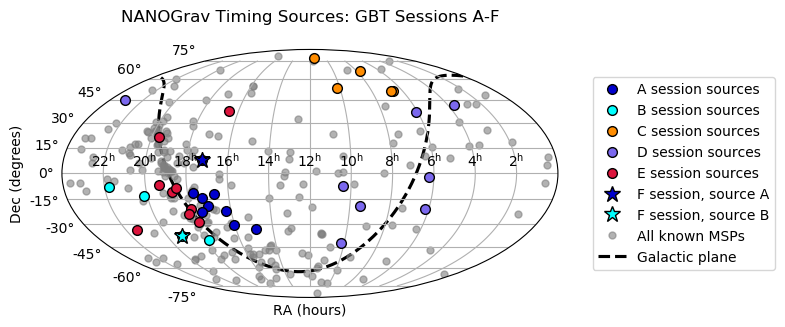

In [17]:
# create projection
ax = plt.subplot(111, projection='astro mollweide')
ax.grid()

#add labels
ax.set_xlabel("RA (hours)")
ax.set_ylabel("Dec (degrees)")

#add galactic plane
lon_array = np.arange(0,360)
lat = 0.
eq_array = np.zeros((360,2))
for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon), np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
RA = eq_array[:,0]
#print(RA)
RA = np.roll(RA,243) #use np.roll to avoid unwanted horizontal line with ax.plot
Dec = eq_array[:,1]
#print(Dec)
Dec = np.roll(Dec,243) #ditto


#plot_mwd(RA, Dec)
#plt.show()

'''def update_plot(a_sess, b_sess, c_sess, d_sess, e_sess, fa_sess, fb_sess, all_msps, gplane):
    
    ax.clear()
    
    if a_sess:
        ax.plot(a.ra.radian,a.dec.radian, '.', color="mediumblue", markersize=14, mec='k')
    if b_sess:
        ax.plot(b.ra.radian,b.dec.radian, '.', color="cyan", markersize=14, mec='k')
    if c_sess:
        ax.plot(c.ra.radian,c.dec.radian, '.', color="darkorange", markersize=14, mec='k')
    if d_sess:
        ax.plot(d.ra.radian,d.dec.radian, '.', color="mediumslateblue", markersize=14, mec='k')
    if e_sess:
        ax.plot(e.ra.radian,e.dec.radian, '.', color="crimson", markersize=14, mec='k') 
    if fa_sess:
        ax.plot(fa.ra.radian,fa.dec.radian, '*', color="mediumblue", markersize=12, mec='k')
    if fb_sess:
        ax.plot(fb.ra.radian,fb.dec.radian, '*', color="cyan", markersize=12, mec='k')
    if all_msps:
        ax.plot(msps.ra.radian,msps.dec.radian, '.', color="grey", markersize=10, alpha=0.6, zorder=1) 
    if gplane:
        plot_mwd(RA, Dec)

    ax.grid()
    ax.set_xlabel("RA (hours)")
    ax.set_ylabel("Dec (degrees)")
    plt.title('NANOGrav Timing Sources: GBT Sessions A-F', y=1.08)
    #plot_mwd(RA, Dec)
    #plt.show()
    '''
ax.plot(a.ra.radian,a.dec.radian, '.', color="mediumblue", markersize=14, mec='k', label="A session sources")

ax.plot(b.ra.radian,b.dec.radian, '.', color="cyan", markersize=14, mec='k', label="B session sources")

ax.plot(c.ra.radian,c.dec.radian, '.', color="darkorange", markersize=14, mec='k', label="C session sources")
 
ax.plot(d.ra.radian,d.dec.radian, '.', color="mediumslateblue", markersize=14, mec='k', label="D session sources")
  
ax.plot(e.ra.radian,e.dec.radian, '.', color="crimson", markersize=14, mec='k', label="E session sources") 
  
ax.plot(fa.ra.radian,fa.dec.radian, '*', color="mediumblue", markersize=12, mec='k', label="F session, source A")
  
ax.plot(fb.ra.radian,fb.dec.radian, '*', color="cyan", markersize=12, mec='k', label="F session, source B")
   
ax.plot(msps.ra.radian,msps.dec.radian, '.', color="grey", markersize=10, alpha=0.6, zorder=1, label="All known MSPs") 


plt.title('NANOGrav Timing Sources: GBT Sessions A-F', y=1.08)
plot_mwd(RA, Dec)

leg = plt.legend(bbox_to_anchor=(1.07,0.5), loc="center left", borderaxespad=0)

#get figure output 
fig = plt.gcf()
#fig.set_size_inches(10.5, 8)
#plt.suptitle(r'95\% Characteristic Strain Upper Limit, $h_{95}$', y=0.05)
plt.show()
#fig.savefig('/Users/Zach/Desktop/test2.png', bbox_inches = 'tight', dpi=400)


#elapsed_time = time.time() - start_time
#print elapsed_time, "seconds"